### Data Collection

#### Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import datasets
from sklearn import metrics

from sklearn.pipeline import Pipeline

#### Load dataset

In [2]:
boston = datasets.load_boston()
house_price_df = pd.DataFrame(boston.data , columns=boston.feature_names)
house_price_df['PRICE'] = boston.target


In [3]:
house_price_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
house_price_df.shape

(506, 14)

In [5]:
####Check formissing value

house_price_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Descriptive Statistics

In [6]:
house_price_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Checking for correlation

In [7]:
corr = house_price_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

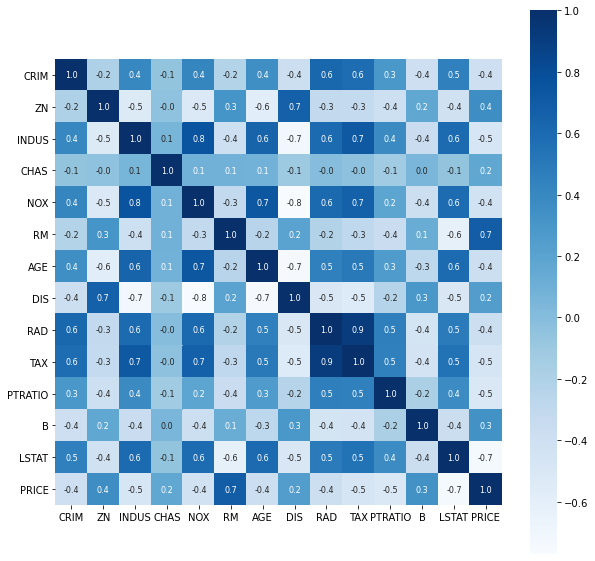

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,cbar=True, annot=True, square=True, fmt='.1f',annot_kws= {'size':8}, cmap='Blues')

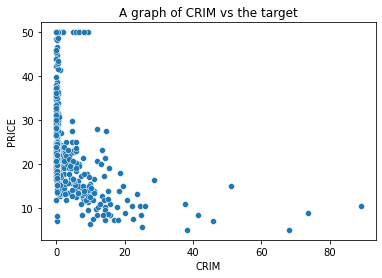

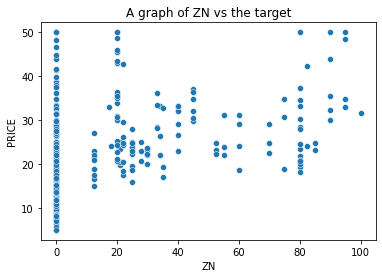

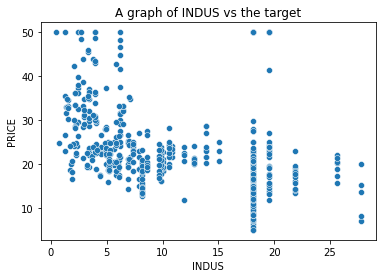

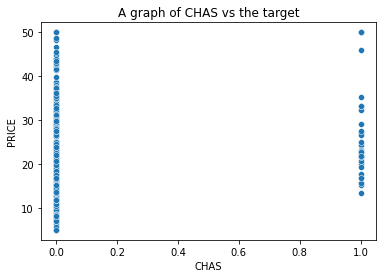

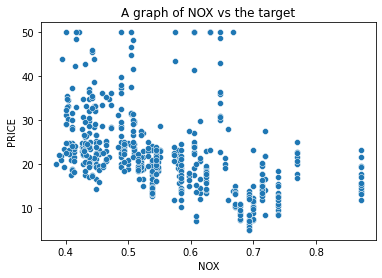

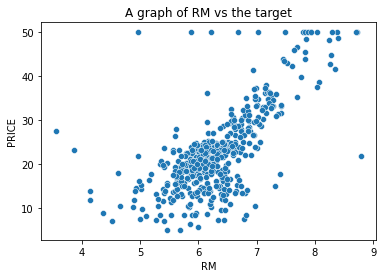

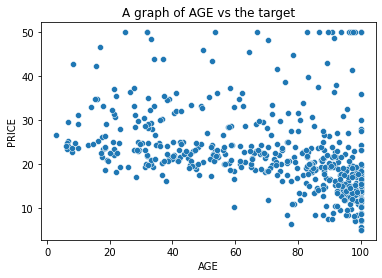

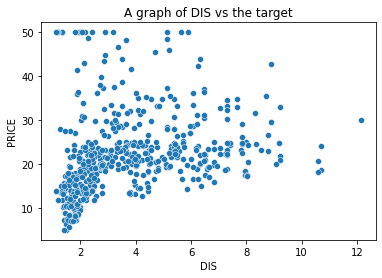

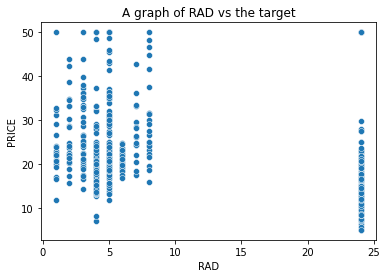

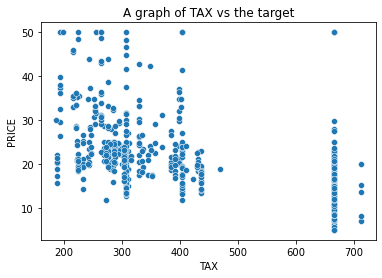

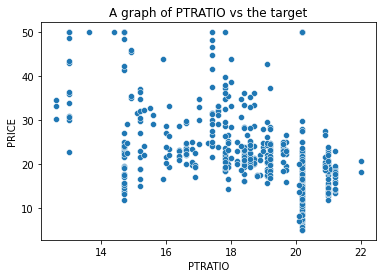

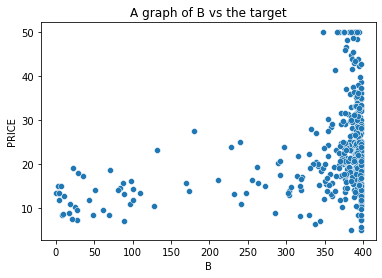

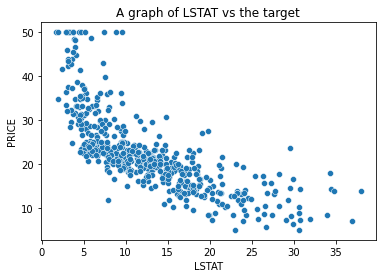

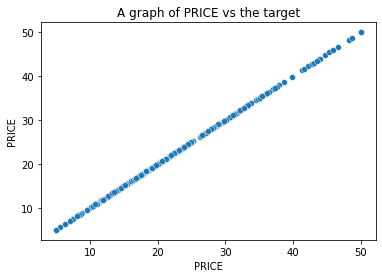

In [9]:
columns = list(house_price_df.columns)

for i in columns:
    plt.figure()
    sns.scatterplot(x=i, y = 'PRICE', data =house_price_df)
    plt.title('A graph of {} vs the target'.format(i))

### Splitting data

In [10]:
X = house_price_df.drop('PRICE', axis=1)
y = house_price_df['PRICE']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model Training and Evaluation

In [12]:
XGB_Regressor = XGBRegressor()
LinearRegressor = LinearRegression()

algs = [XGB_Regressor,LinearRegressor]


##### Training data prediction

In [13]:
R2_train = []
MAE_train = []

for i in algs:
    i.fit(X_train, y_train)
    y_train_pred = i.predict(X_train)
    R2_train.append(metrics.r2_score(y_train,y_train_pred))
    MAE_train.append(metrics.mean_absolute_error(y_train,y_train_pred))

# Create a table for the outputs
metrics_output = pd.DataFrame(columns=['Algorithm', 'R^2','MAE']) 
metrics_output['Algorithm'] = algs
metrics_output['R^2'] = R2_train
metrics_output['MAE'] = MAE_train

# Display output results
metrics_output

,Algorithm,R^2,MAE
0,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.999997,0.011983
1,LinearRegression(),0.756932,3.475152


##### Testing data prediction

In [14]:
R2_test = []
MAE_test = []

for i in algs:
    i.fit(X_test, y_test)
    y_test_pred = i.predict(X_test)
    R2_test.append(metrics.r2_score(y_test,y_test_pred))
    MAE_test.append(metrics.mean_absolute_error(y_test,y_test_pred))

# Create a table for the outputs
metrics_output_2 = pd.DataFrame(columns=['Algorithm', 'R^2','MAE']) 
metrics_output_2['Algorithm'] = algs
metrics_output_2['R^2'] = R2_test
metrics_output_2['MAE'] = MAE_test

# Display output results
metrics_output_2

,Algorithm,R^2,MAE
0,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.000,0.000738
1,LinearRegression(),0.736,2.808974


Since XGBoost displayed the best results, let's expound on it

#### XGBOOST ALGORITHM

In [15]:
xgb_model = XGBRegressor()

In [16]:

# Training Model
xgb_model.fit(X_train, y_train)
y_pred= xgb_model.predict(X_train)

In [17]:
y_pred

array([21.988531 , 21.441448 , 21.69779  , 19.3158   , 37.897583 ,
       35.4037   , 16.825022 , 42.799583 , 19.684017 , 18.259174 ,
       14.304906 , 24.268335 , 15.316265 , 26.392042 , 34.89899  ,
       22.107101 , 22.184048 , 30.705772 , 17.009995 , 23.794188 ,
       10.1992655, 26.59375  , 28.658365 , 23.01851  ,  8.290838 ,
       16.299831 , 23.09452  , 26.991251 , 22.030258 , 22.597614 ,
       33.817497 , 32.391876 , 23.883768 , 24.96849  , 20.287418 ,
       18.200712 , 15.251753 , 20.783327 , 18.687176 , 28.985176 ,
       50.003918 , 15.393926 , 22.00503  , 49.99996  , 22.778397 ,
       16.867874 , 28.516785 , 14.899861 , 12.089779 , 14.60055  ,
       18.381819 , 13.013606 , 25.022923 , 30.068197 , 23.093609 ,
       11.688178 , 21.700241 , 13.812403 , 18.235401 , 15.0078335,
       45.407516 , 16.392744 , 50.004337 , 10.902743 , 14.086978 ,
       21.594488 , 23.936005 , 23.70122  , 18.103065 , 20.91181  ,
       41.30104  , 18.601965 , 23.29001  , 25.001019 , 18.8075

##### Visualizing The Actual Prices and Predicted Prices

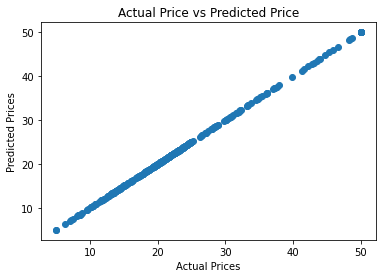

In [18]:
plt.scatter(y_train,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

The prices values are very close to each other which implies that the prices predicted by the model are similar to the actual prices given in the dataset.

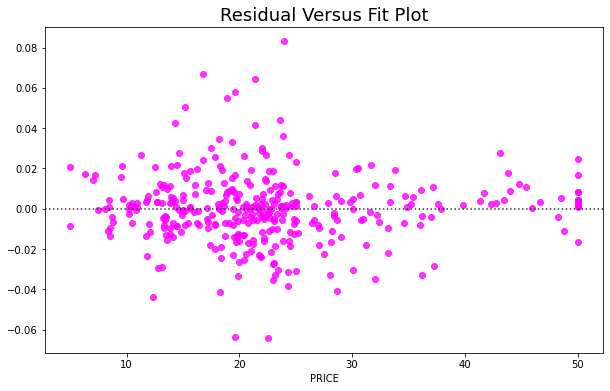

In [19]:
plt.figure(figsize=(10,6))
sns.residplot(y_train,y_pred, color='magenta')
plt.title('Residual Versus Fit Plot', fontdict={'size':18})
plt.show()

The plots are randomly distributed (**Assumption Satisfied**)

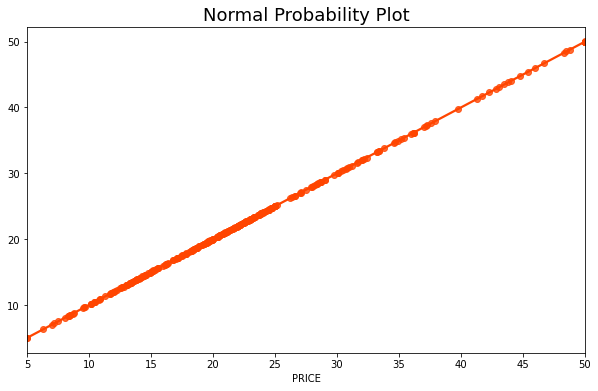

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(y_train,y_pred, color='orangered')
plt.title('Normal Probability Plot', fontdict={'size':18})
plt.show()

XGBoost algorithm is used because the dataset is small.